In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('top5_data.csv')

In [2]:
data

,Rk_x,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Carries,TotDist,PrgDist,PrgC,01-Mar,CPA,Mis,Dis,Rec,PrgR
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24-126,2000.0,13.0,0,...,351.0,2119.0,1104.0,22.0,12.0,7.0,11.0,8.0,356.0,25.0
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,23-200,2000.0,12.6,2,...,352.0,2304.0,1128.0,29.0,24.0,5.0,35.0,29.0,403.0,77.0
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,20-257,2003.0,1.1,0,...,43.0,193.0,50.0,2.0,0.0,1.0,5.0,4.0,46.0,7.0
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-034,2006.0,0.0,0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,36-224,1987.0,27.9,3,...,1432.0,8300.0,4728.0,36.0,19.0,0.0,21.0,4.0,1336.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2789,Lovro Zvonarek,hr CRO,MF,Bayern Munich,de Bundesliga,19-001,2005.0,0.2,0,...,7.0,42.0,14.0,2.0,0.0,2.0,2.0,0.0,10.0,1.0
2789,2790,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25-144,1998.0,32.4,8,...,1487.0,7683.0,3283.0,85.0,78.0,32.0,50.0,54.0,1736.0,187.0
2790,2791,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-353,1990.0,13.4,5,...,183.0,529.0,151.0,3.0,6.0,1.0,22.0,8.0,352.0,33.0
2791,2792,Milan Đurić,ba BIH,FW,Monza,it Serie A,33-353,1990.0,11.5,3,...,133.0,386.0,91.0,2.0,2.0,1.0,20.0,12.0,267.0,22.0


In [3]:
data = data[data['Pos'] == 'FW']

In [4]:
data

,Rk_x,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Carries,TotDist,PrgDist,PrgC,01-Mar,CPA,Mis,Dis,Rec,PrgR
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-034,2006.0,0.0,0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,8,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-042,2003.0,9.9,4,...,257.0,1687.0,770.0,25.0,22.0,13.0,44.0,14.0,254.0,77.0
11,12,Tammy Abraham,eng ENG,FW,Roma,it Serie A,26-220,1997.0,1.4,1,...,19.0,122.0,62.0,4.0,1.0,1.0,5.0,0.0,28.0,8.0
17,18,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24-101,2000.0,23.8,8,...,421.0,2578.0,979.0,39.0,23.0,21.0,61.0,28.0,449.0,123.0
22,23,Elijah Adebayo,eng ENG,FW,Luton Town,eng Premier League,26-123,1998.0,13.9,10,...,237.0,1353.0,372.0,15.0,12.0,12.0,58.0,30.0,302.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2759,Duván Zapata,co COL,FW,Atalanta,it Serie A,33-038,1991.0,1.2,1,...,47.0,206.0,70.0,3.0,1.0,2.0,5.0,0.0,50.0,13.0
2774,2775,Edon Zhegrova,xk KVX,FW,Lille,fr Ligue 1,25-039,1999.0,23.4,6,...,940.0,7272.0,3568.0,105.0,75.0,51.0,52.0,44.0,916.0,297.0
2779,2780,Joshua Zirkzee,nl NED,FW,Bologna,it Serie A,22-353,2001.0,29.9,11,...,792.0,4049.0,1737.0,52.0,46.0,22.0,110.0,61.0,1011.0,177.0
2790,2791,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-353,1990.0,13.4,5,...,183.0,529.0,151.0,3.0,6.0,1.0,22.0,8.0,352.0,33.0


In [5]:
data = data[data['90s'] >= 10]

In [6]:
data

,Rk_x,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Carries,TotDist,PrgDist,PrgC,01-Mar,CPA,Mis,Dis,Rec,PrgR
17,18,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,24-101,2000.0,23.8,8,...,421.0,2578.0,979.0,39.0,23.0,21.0,61.0,28.0,449.0,123.0
22,23,Elijah Adebayo,eng ENG,FW,Luton Town,eng Premier League,26-123,1998.0,13.9,10,...,237.0,1353.0,372.0,15.0,12.0,12.0,58.0,30.0,302.0,95.0
24,25,Simon Adingra,ci CIV,FW,Brighton,eng Premier League,22-129,2002.0,21.8,6,...,695.0,4567.0,2677.0,101.0,44.0,54.0,41.0,27.0,714.0,258.0
46,47,Ludovic Ajorque,fr FRA,FW,Mainz 05,de Bundesliga,30-074,1994.0,14.9,2,...,258.0,871.0,278.0,4.0,6.0,1.0,41.0,10.0,445.0,88.0
80,81,Miguel Almirón,py PAR,FW,Newcastle Utd,eng Premier League,30-089,1994.0,20.7,3,...,624.0,4272.0,2168.0,77.0,41.0,21.0,29.0,25.0,710.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2758,Duván Zapata,co COL,FW,Torino,it Serie A,33-038,1991.0,29.5,11,...,702.0,3936.0,1586.0,66.0,47.0,26.0,110.0,53.0,880.0,230.0
2774,2775,Edon Zhegrova,xk KVX,FW,Lille,fr Ligue 1,25-039,1999.0,23.4,6,...,940.0,7272.0,3568.0,105.0,75.0,51.0,52.0,44.0,916.0,297.0
2779,2780,Joshua Zirkzee,nl NED,FW,Bologna,it Serie A,22-353,2001.0,29.9,11,...,792.0,4049.0,1737.0,52.0,46.0,22.0,110.0,61.0,1011.0,177.0
2790,2791,Milan Đurić,ba BIH,FW,Hellas Verona,it Serie A,33-353,1990.0,13.4,5,...,183.0,529.0,151.0,3.0,6.0,1.0,22.0,8.0,352.0,33.0


In [7]:
data.columns

Index(['Rk_x', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
       'Matches', 'Rk_y', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd',
       'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Succ%', 'Tkld', 'Tkld%',
       'Carries', 'TotDist', 'PrgDist', 'PrgC', '01-Mar', 'CPA', 'Mis', 'Dis',
       'Rec', 'PrgR'],
      dtype='object')

In [8]:
# keep only the required columns
columns_to_keep = ['Player', '90s', 'Gls', 'Sh/90', 'SoT%', 'xG', 'G-xG', 'Att Pen']
data = data[columns_to_keep]

In [9]:
data.rename({'Att Pen': 'Pen Touch'}, axis=1, inplace=True)

C:\Users\sid7h\AppData\Local\Temp\ipykernel_19428\751688152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename({'Att Pen': 'Pen Touch'}, axis=1, inplace=True)


In [10]:
data.head()

,Player,90s,Gls,Sh/90,SoT%,xG,G-xG,Pen Touch
17,Akor Adams,23.8,8,3.23,41.6,12.2,-4.2,110.0
22,Elijah Adebayo,13.9,10,2.08,44.8,5.7,4.3,77.0
24,Simon Adingra,21.8,6,2.11,47.8,3.9,2.1,131.0
46,Ludovic Ajorque,14.9,2,1.81,22.2,5.3,-3.3,85.0
80,Miguel Almirón,20.7,3,1.93,27.5,4.5,-1.5,83.0


In [11]:
# Calculate per 90 attributes for the ones that dont exist in the df
data['G/90'] = data['Gls'] / data['90s']
data['xG/90'] = data['xG'] / data['90s']
data['Pen Touch/90'] = data['Pen Touch'] / data['90s']

C:\Users\sid7h\AppData\Local\Temp\ipykernel_19428\3842389405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['G/90'] = data['Gls'] / data['90s']
C:\Users\sid7h\AppData\Local\Temp\ipykernel_19428\3842389405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['xG/90'] = data['xG'] / data['90s']
C:\Users\sid7h\AppData\Local\Temp\ipykernel_19428\3842389405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [12]:
data.head()

,Player,90s,Gls,Sh/90,SoT%,xG,G-xG,Pen Touch,G/90,xG/90,Pen Touch/90
17,Akor Adams,23.8,8,3.23,41.6,12.2,-4.2,110.0,0.336134,0.512605,4.621849
22,Elijah Adebayo,13.9,10,2.08,44.8,5.7,4.3,77.0,0.719424,0.410072,5.539568
24,Simon Adingra,21.8,6,2.11,47.8,3.9,2.1,131.0,0.275229,0.178899,6.009174
46,Ludovic Ajorque,14.9,2,1.81,22.2,5.3,-3.3,85.0,0.134228,0.355705,5.704698
80,Miguel Almirón,20.7,3,1.93,27.5,4.5,-1.5,83.0,0.144928,0.217391,4.009662


In [13]:
# Selecting the specific features for clustering
features = data[['G/90', 'Sh/90', 'SoT%', 'xG/90', 'G-xG', 'Pen Touch/90']]

In [14]:
# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

In [15]:
# Standardizing the features to have mean=0 and variance=1
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

C:\Users\sid7h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sid7h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sid7h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sid7h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

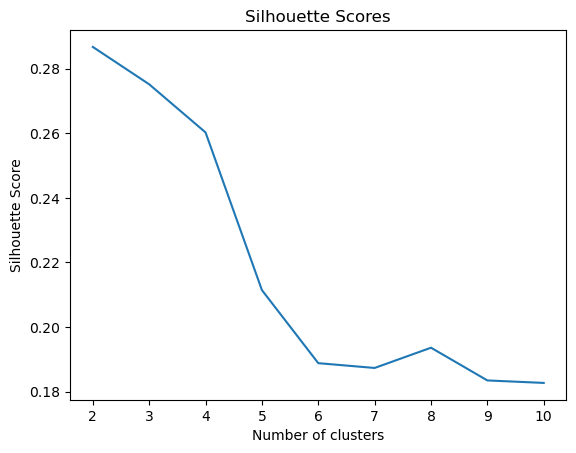

In [16]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores for different numbers of clusters
silhouette_scores = {}
for k in range(2, 11):  # Silhouette score is only relevant when k > 1
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores[k] = score

# Plot Silhouette Scores for each k
plt.figure()
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores")
plt.show()

In [18]:
# Applying K-Means clustering with a specified number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\sid7h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sid7h\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sid7h\AppData\Local\Temp\ipykernel_19428\2195551211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(features_scaled)


In [19]:
# Outputting the first few entries with the new cluster labels and selected features
print(data[['Player', 'G/90', 'Sh/90', 'SoT%', 'xG/90', 'G-xG', 'Pen Touch/90', 'Cluster']].head())

             Player      G/90  Sh/90  SoT%     xG/90  G-xG  Pen Touch/90  \
17       Akor Adams  0.336134   3.23  41.6  0.512605  -4.2      4.621849   
22   Elijah Adebayo  0.719424   2.08  44.8  0.410072   4.3      5.539568   
24    Simon Adingra  0.275229   2.11  47.8  0.178899   2.1      6.009174   
46  Ludovic Ajorque  0.134228   1.81  22.2  0.355705  -3.3      5.704698   
80   Miguel Almirón  0.144928   1.93  27.5  0.217391  -1.5      4.009662   

    Cluster  
17        0  
22        1  
24        1  
46        2  
80        2  


In [20]:
# Calculating the centroids for each cluster
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=['G/90', 'Sh/90', 'SoT%', 'xG/90', 'G-xG', 'Pen Touch/90'])

print(centroids_df)

       G/90     Sh/90       SoT%     xG/90      G-xG  Pen Touch/90
0  0.380812  3.176522  36.997826  0.473459 -1.753074      6.229600
1  0.528422  2.395128  47.192308  0.407870  2.388682      4.570313
2  0.245112  2.288452  34.270238  0.274328 -0.423810      4.229219
3  0.829396  3.723684  44.778947  0.740267  1.794737      6.905749


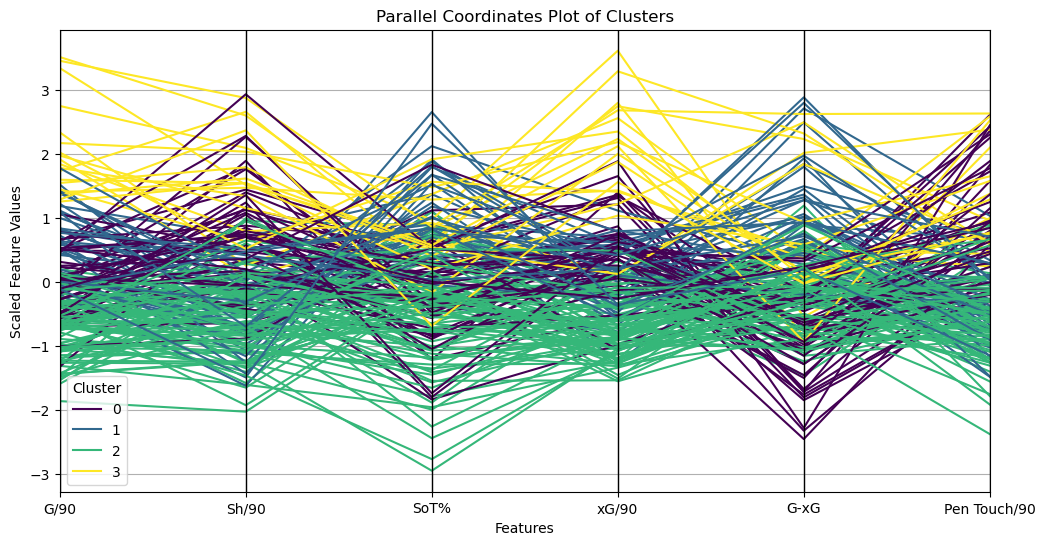

In [23]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Normalize or scale your data if not already done; it helps in better visualization
data_scaled = data.copy()
features_to_plot = ['G/90', 'Sh/90', 'SoT%', 'xG/90', 'G-xG', 'Pen Touch/90']
scaler = StandardScaler()
data_scaled[features_to_plot] = scaler.fit_transform(data[features_to_plot])

# Adding 'Cluster' to the scaled data for coloring
data_scaled['Cluster'] = data['Cluster'].astype(str)  # Convert cluster labels to string for coloring

# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(data_scaled[['Cluster'] + features_to_plot], 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Scaled Feature Values')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

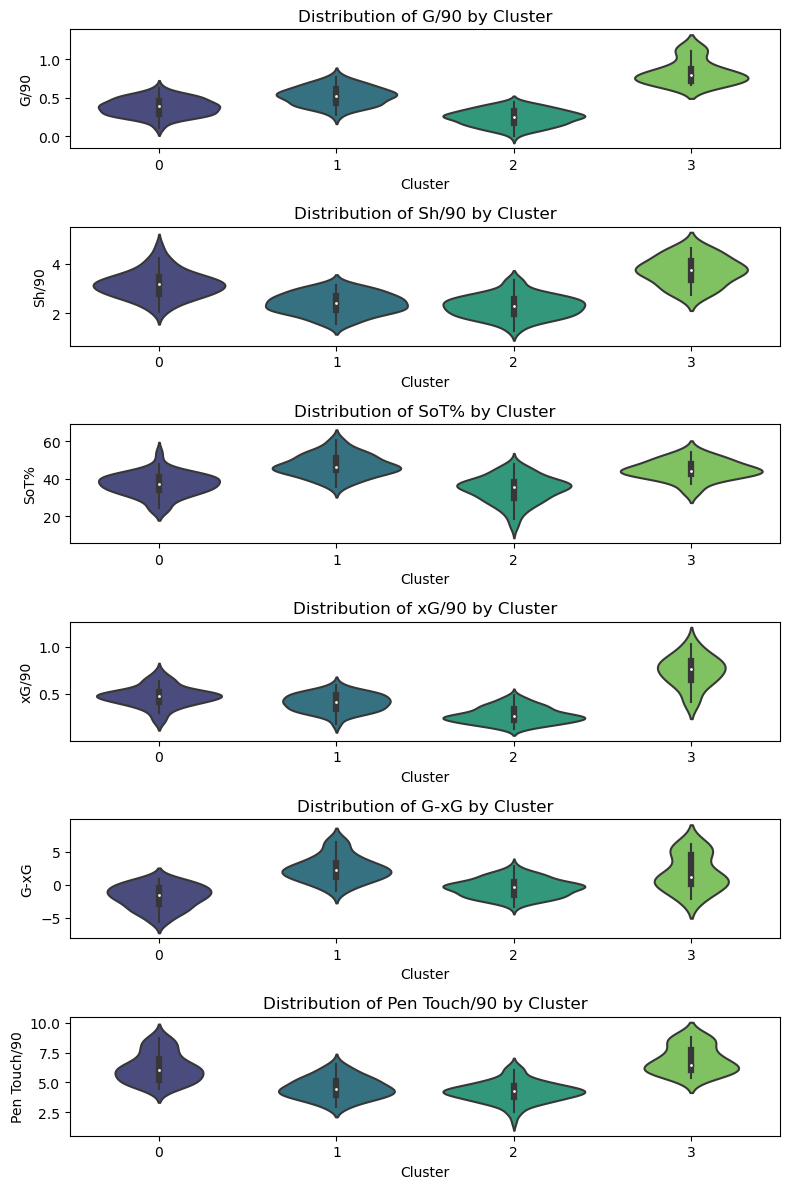

In [26]:
import seaborn as sns

# Plotting violin plots for each feature
fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(8, 12))
for i, feature in enumerate(features_to_plot):
    sns.violinplot(x='Cluster', y=feature, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title('Distribution of {} by Cluster'.format(feature))
plt.tight_layout()
plt.show()

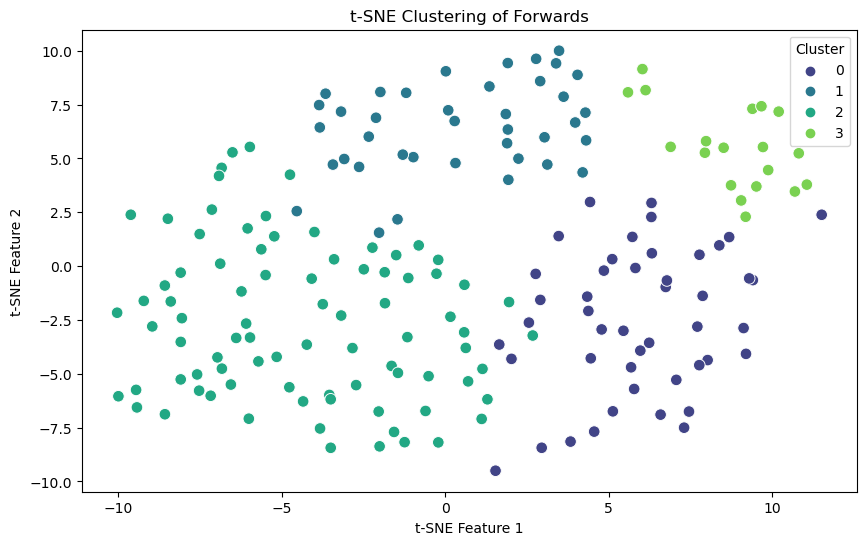

In [27]:
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(features_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=data['Cluster'].astype(str), palette='viridis', legend='full', s=70)
plt.title('t-SNE Clustering of Forwards')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

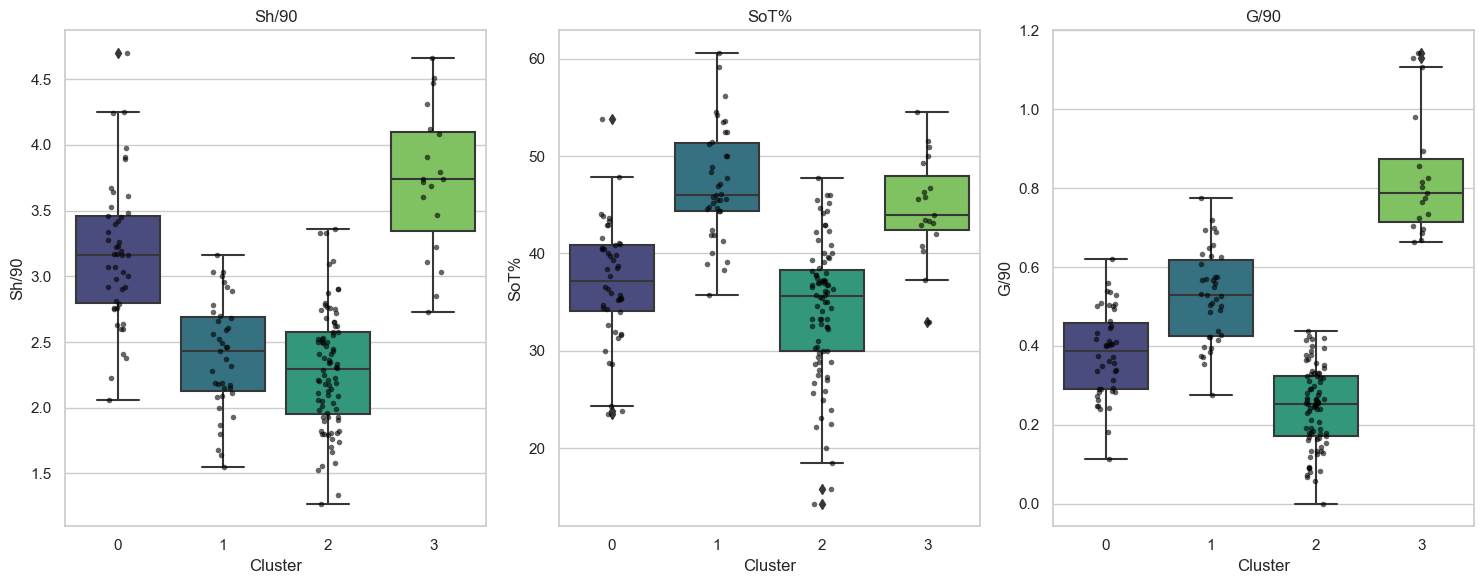

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the metrics for which you want to create box plots
metrics = ['Sh/90', 'SoT%', 'G/90']

# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(5 * len(metrics), 6), sharey=False)

# Loop through the list of metrics and create a box and scatter plot for each
for i, metric in enumerate(metrics):
    # Create boxplot
    sns.boxplot(x='Cluster', y=metric, data=data, ax=axes[i], palette="viridis")
    
    # Create scatter plot on top of the boxplot
    sns.stripplot(x='Cluster', y=metric, data=data, ax=axes[i], color='black', size=4, jitter=True, alpha=0.6)
    
    # Set titles and labels
    axes[i].set_title(f'{metric}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(metric)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


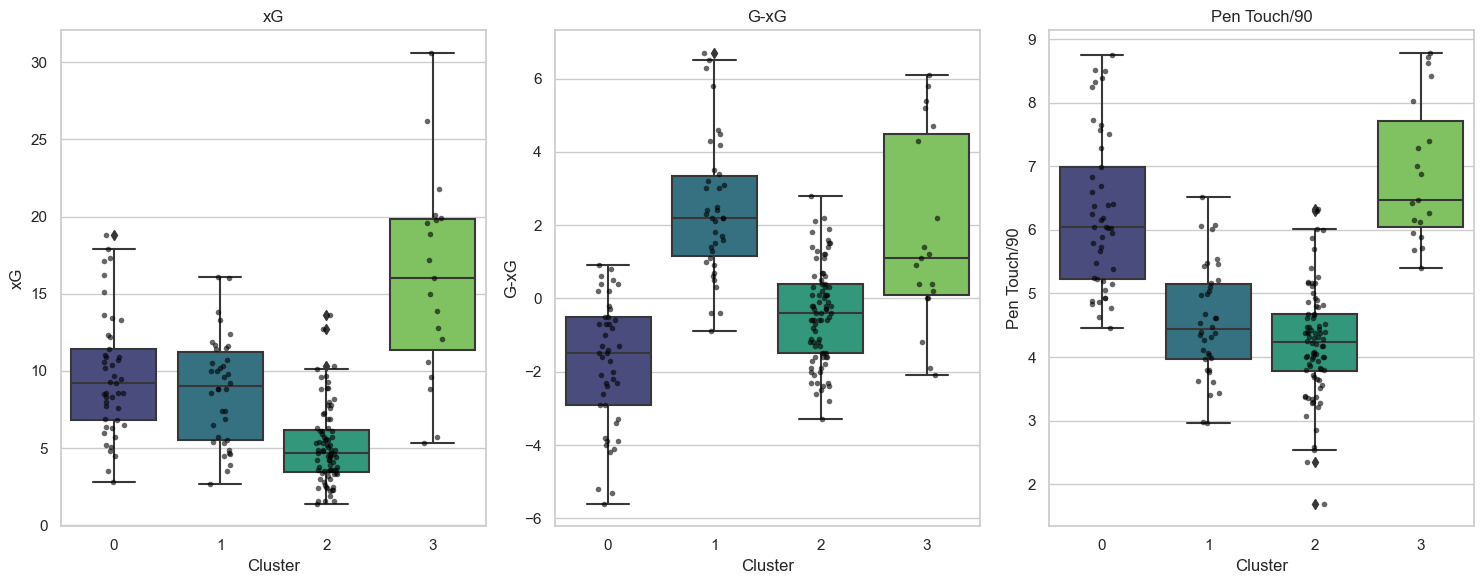

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the metrics for which you want to create box plots
metrics = ['xG', 'G-xG', 'Pen Touch/90']

# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(5 * len(metrics), 6), sharey=False)

# Loop through the list of metrics and create a box and scatter plot for each
for i, metric in enumerate(metrics):
    # Create boxplot
    sns.boxplot(x='Cluster', y=metric, data=data, ax=axes[i], palette="viridis")
    
    # Create scatter plot on top of the boxplot
    sns.stripplot(x='Cluster', y=metric, data=data, ax=axes[i], color='black', size=4, jitter=True, alpha=0.6)
    
    # Set titles and labels
    axes[i].set_title(f'{metric}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(metric)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [32]:
# Define the number of top players per cluster
top_n = 5

# Select the top N players from each cluster based on goals scored
top_players_per_cluster = data.groupby('Cluster').apply(lambda x: x.nlargest(top_n, 'Gls')).reset_index(drop=True)

# Print the top players to verify the selection
top_players_per_cluster[['Player', 'Gls', 'Cluster']].to_csv("top_players_cluster.csv", index=False)
